In [13]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [14]:
S0 = 100
r = 0.05
sigma = 0.2
sampleX = np.random.normal(0,1,10000)

def S(X_i,T):
    return S0*np.exp((r-sigma**2/2)*T+sigma*np.sqrt(T)*X_i)

In [21]:
def getTheta(X,T,K):
    total = 0
    for X_i in X:
        total += S(X_i,T)
    return total/len(X)

In [22]:
def getCk(X,T,K,theta):
    total = 0
    for X_i in X:
        total += max(0,S(X_i,T)-K)
    return np.exp(-r*T)*total/len(X)

In [28]:
def getStdError(X,T,theta):
    total = 0
    for X_i in X:
        total += (S(X_i,T)-theta)**2
    return np.sqrt(total/(len(X)-1))

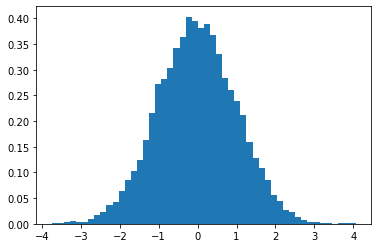

In [43]:
plt.hist(X, 50, density=True)
plt.show()

In [29]:
Ts = [2,4,6,8]
Ks = [90,100,110]

for K in Ks:
    for T in Ts:
        theta = getTheta(sampleX,T,K)
        Ck = getCk(sampleX,T,K,theta)
        minusCk = getCk(-sampleX,T,K,theta)
        print("Simple: K =",K,"T =",T,"Ck =",Ck,"StdError =",getStdError(sampleX,T,theta))
        print("Antithetic: K =",K,"T =",T,"Ck =",(Ck+minusCk)/2,getStdError(sampleX,T,theta))


Simple: K = 90 T = 2 Ck = 21.887049278961786 StdError = 31.908185654677276
Antithetic: K = 90 T = 2 Ck = 22.041899312971687
Simple: K = 90 T = 4 Ck = 30.457091014946478 StdError = 50.929282401637366
Antithetic: K = 90 T = 4 Ck = 30.669070333674927
Simple: K = 90 T = 6 Ck = 37.57343969081571 StdError = 70.43359013220802
Antithetic: K = 90 T = 6 Ck = 37.82815269162388
Simple: K = 90 T = 8 Ck = 43.742149205359674 StdError = 91.88210656647807
Antithetic: K = 90 T = 8 Ck = 44.029286038127694
Simple: K = 100 T = 2 Ck = 15.980893926464457 StdError = 31.908185654677276
Antithetic: K = 100 T = 2 Ck = 16.104118265827587
Simple: K = 100 T = 4 Ck = 25.008829215334135 StdError = 50.929282401637366
Antithetic: K = 100 T = 4 Ck = 25.189467225273226
Simple: K = 100 T = 6 Ck = 32.53036324094802 StdError = 70.43359013220802
Antithetic: K = 100 T = 6 Ck = 32.75416772268078
Simple: K = 100 T = 8 Ck = 39.07802683282358 StdError = 91.88210656647807
Antithetic: K = 100 T = 8 Ck = 39.33616776918364
Simple: K 